# Group 5
## Team members:
- Jianting Liu(8950907)
- David (8999846) 
- Marieth (9016702)


## Adding one more dataset
Data from statistic Canada :https://www150.statcan.gc.ca/n1/pub/71-607-x/71-607-x2019007-eng.htm 
It contains median income from year of 2003 to 2022

In [86]:
import pandas as pd
#income data
income_data = pd.read_csv("incomedata.csv")
income_data

,Median income,Count of families,Reference year,Family type,Geography,Selected income concept
0,$52520,13562880,2003,All family units,Canada,After-tax income
1,$53220,13740790,2004,All family units,Canada,After-tax income
2,$53850,13970170,2005,All family units,Canada,After-tax income
3,$55100,14157690,2006,All family units,Canada,After-tax income
4,$56790,14330960,2007,All family units,Canada,After-tax income
5,$57410,14546430,2008,All family units,Canada,After-tax income
6,$57690,14714650,2009,All family units,Canada,After-tax income
7,$57400,14888680,2010,All family units,Canada,After-tax income
8,$57240,15120820,2011,All family units,Canada,After-tax income
9,$58020,15299720,2012,All family units,Canada,After-tax income


**Merging data**
The data I downloaded is based on annual data. I need to distribute the annual data evenly across each month to generate monthly data, and then merge it with other data.


In [87]:
import pandas as pd

# load data
income_data = pd.read_csv("incomedata.csv")

# clean data with $
income_data['Median income'] = income_data['Median income'].str.replace('$', '').str.replace(',', '').astype(float)

# create a list to store new data
new_rows = []

# loop for income data
for index, row in income_data.iterrows():
    year = row["Reference year"]
    median_income = row["Median income"] / 12
    for month in range(1, 13):
        date_str = f"{year}-{month:02d}-01"
        date = pd.to_datetime(date_str, format='%Y-%m-%d') 
        new_row = {
            "Date": date,
            "Median income": median_income,
            "Count of families": row["Count of families"],
            "Family type": row["Family type"],
            "Geography": row["Geography"],
            "Selected income concept": row["Selected income concept"]
        }
        # add rows
        new_rows.append(new_row)

# new data
new_df = pd.DataFrame(new_rows)

# save file
new_df.to_csv("monthly_income_data.csv", index=False)

newincome_data = pd.read_csv("monthly_income_data.csv")
newincome_data

,Date,Median income,Count of families,Family type,Geography,Selected income concept
0,2003-01-01,4376.666667,13562880,All family units,Canada,After-tax income
1,2003-02-01,4376.666667,13562880,All family units,Canada,After-tax income
2,2003-03-01,4376.666667,13562880,All family units,Canada,After-tax income
3,2003-04-01,4376.666667,13562880,All family units,Canada,After-tax income
4,2003-05-01,4376.666667,13562880,All family units,Canada,After-tax income
...,...,...,...,...,...,...
235,2022-08-01,5066.666667,17925520,All family units,Canada,After-tax income
236,2022-09-01,5066.666667,17925520,All family units,Canada,After-tax income
237,2022-10-01,5066.666667,17925520,All family units,Canada,After-tax income
238,2022-11-01,5066.666667,17925520,All family units,Canada,After-tax income


Merge data into one file

In [88]:
import pandas as pd

#left data
original_data = pd.read_excel("News_release_chart_data_August_2024.xlsx")
income_data = pd.read_csv("monthly_income_data.csv")
income_data['Date'] = income_data['Date'].astype('datetime64[ns]')

merged_df = pd.merge(original_data, income_data[['Date', 'Median income']], on='Date', how='left')
merged_df.head(300)

,Date,Composite,One_storey,Two_storey,Townhouse,Apartment_unit,Median income
0,2005-01-01,239800,207700,302900,201700,172000,4487.5
1,2005-02-01,240500,208400,303300,202300,173000,4487.5
2,2005-03-01,241300,209200,304300,202900,173900,4487.5
3,2005-04-01,242000,210100,304800,203300,174600,4487.5
4,2005-05-01,242600,210600,305400,203700,175400,4487.5
...,...,...,...,...,...,...,...
230,2024-03-01,718200,612900,928700,663600,525200,NaN
231,2024-04-01,718100,613900,929600,661800,523200,NaN
232,2024-05-01,716700,613100,928300,661100,521800,NaN
233,2024-06-01,717600,615700,929400,661000,521200,NaN


## Finds out the distribution on the set 
**QQ Normal Plots**

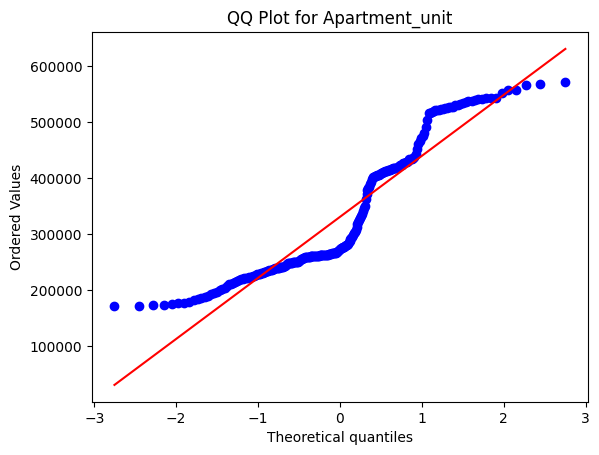

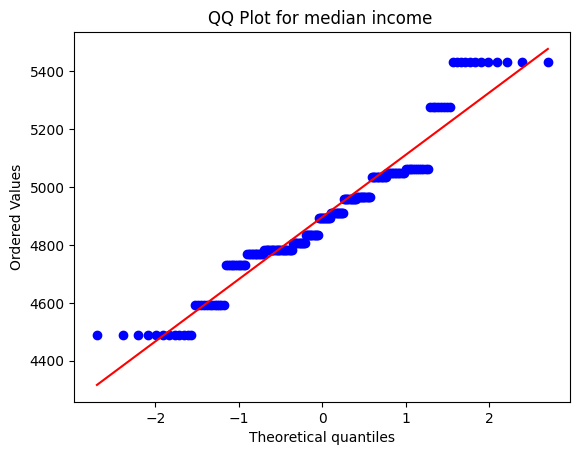

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


# 'population'
data_p = merged_df['Apartment_unit']
# plot
stats.probplot(data_p, dist="norm", plot=plt)
plt.title("QQ Plot for Apartment_unit")
plt.show()

# 'income'
data_i = merged_df['Median income']
# plot
stats.probplot(data_i.head(200), dist="norm", plot=plt)
plt.title("QQ Plot for median income ")
plt.show()


**histograms**

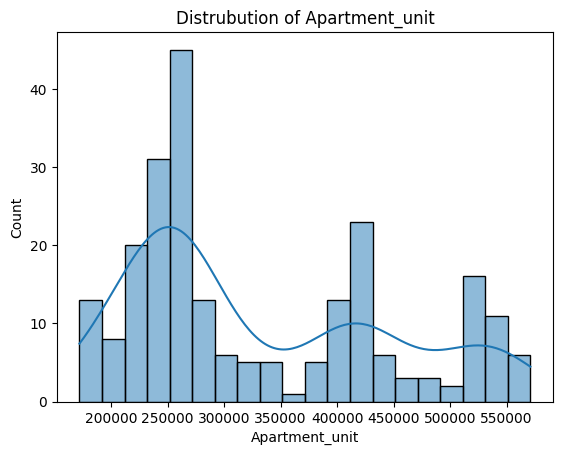

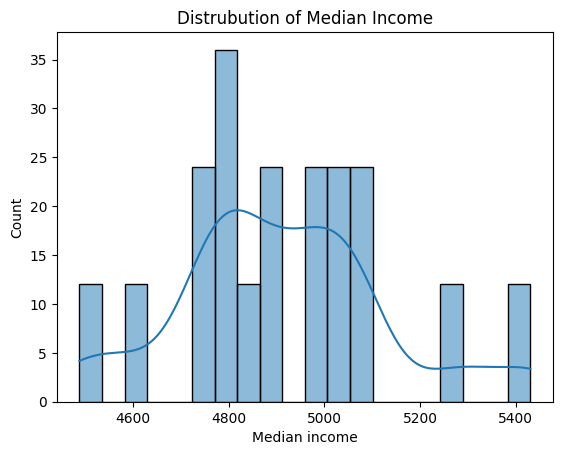

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#seaborn
sns.histplot(data=merged_df, x='Apartment_unit', bins=20, kde=True)  # kde=True 
plt.title('Distrubution of Apartment_unit')
plt.show()

# histograms
sns.histplot(data=merged_df, x='Median income', bins=20, kde=True)
plt.title('Distrubution of Median Income')
plt.show()

 **box plots**

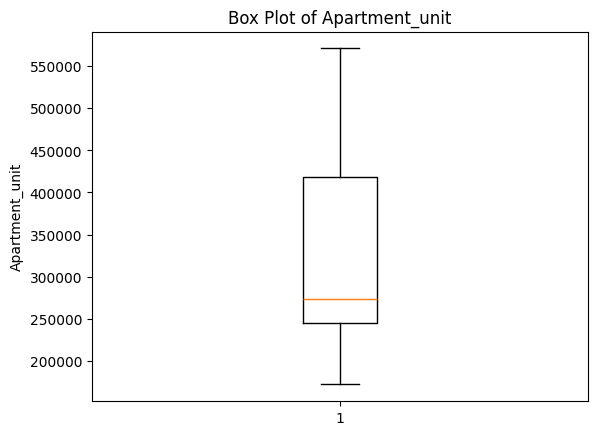

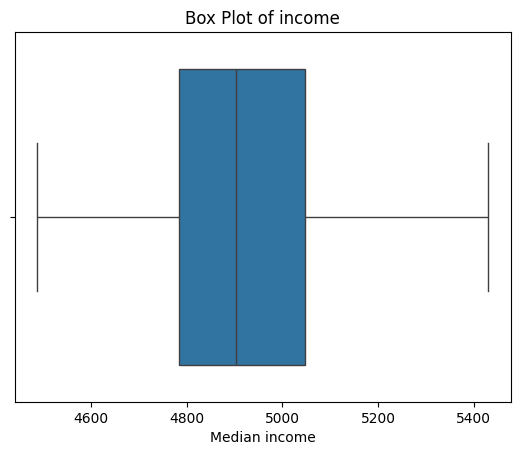

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Apartment_unit
plt.boxplot(merged_df['Apartment_unit'])
plt.ylabel('Apartment_unit')
plt.title('Box Plot of Apartment_unit')
plt.show()

# income
sns.boxplot(x=merged_df['Median income'])
plt.title('Box Plot of income')
plt.show()



## z-score

In [92]:
import numpy as np


Apartment_unit = merged_df["Apartment_unit"]  # population

#mean
mean = np.mean(Apartment_unit)
print("Mean: ",mean)

#standard devation
std_dev = np.std(Apartment_unit)
print("standard devation:",std_dev)

# value = 490000
z_scores = (490000 - mean) / std_dev
print("value: ", 490000)
print("z_score:" ,z_scores)


Mean:  331128.93617021275
standard devation: 113991.17851710864
value:  490000
z_score: 1.39371367062358


**Summary**

The z-score of 1.39371367062358 indicates that the value of 490000 is 1.39 standard deviations above the mean(1425) of the "Apartment_unit" column in the merged DataFrame. This suggests that 490000 is a relatively high value compared to the rest of the data in that column

This means that the value 490000 is not an outlier or unusual.

## **T-score**

In [93]:
import numpy as np
import pandas as pd

#Get random_population 30 records
random_population_sample = merged_df['Apartment_unit'].sample(n=30, replace=True) 
#print(random_population_sample)

#mean
mean = np.mean(random_population_sample)
print("Mean: ",mean)

#standard devation
std_dev = np.std(random_population_sample)
print("standard devation:",std_dev)

n = len(random_population_sample)

print("Size: ", n)

# value = 300500
value = 300500

# Calcular el t-score
t_score = (value - mean) / (std_dev / np.sqrt(n))
print("value: ", value)
print("t_score:" ,t_score)

Mean:  331756.6666666667
standard devation: 117439.71413263725
Size:  30
value:  300500
t_score: -1.457767632712195


**Summary**

The t-score of -2.34 indicates that the value 300500 is 2.34 standard deviations below the sample mean, which is 352126. The value 300500 is exceptionally far away from the mean

Such an extreme t-score is a clear sign that 300500 does not behave like the other values in the sample and could be an outlier.

## Shapiro-Wilk Normality Test

In [94]:
import scipy.stats as stats

Apartment_unit = merged_df["Apartment_unit"]

# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(Apartment_unit)
print("Shapiro-Wilk test for population:")
print("Shapiro-Wilk Statistic:", statistic)
print("P-value:", p_value)

Shapiro-Wilk test for population:
Shapiro-Wilk Statistic: 0.8891481983744589
P-value: 4.111271007552431e-12


**Summary**

The Shapiro-Wilk test was conducted to assess the normality of the "Apartment_unit" data. The test yielded a p-value of 4.1112710075524e-12, which is significantly less than the conventional alpha level of 0.05. This extremely small p-value provides strong evidence against the null hypothesis that the data is normally distributed. In other words, we can confidently reject the assumption of normality for this dataset.


In [95]:
import scipy.stats as stats

income = merged_df["Median income"]

# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(income.head(200))
print("Shapiro-Wilk test for population:")
print("Shapiro-Wilk Statistic:", statistic)
print("P-value:", p_value)

Shapiro-Wilk test for population:
Shapiro-Wilk Statistic: 0.9376566708397969
P-value: 1.4401616257624587e-07


## Hypothesis Testing :

- **Null hypothesis (H0)**: There is no correlation between median income (Median Income) and apartment unit price (Apartment_unit).
- **Alternative hypothesis (H1)**: There is a correlation between median income (Median Income) and apartment unit price (Apartment_unit).

In [96]:

#It is verified that there is null data
print(merged_df[['Apartment_unit', 'Median income']].isnull().sum())

#Clear the data replacing with the mean
merged_df['Median income'].fillna(merged_df['Median income'].mean(), inplace=True)

print(merged_df[['Apartment_unit', 'Median income']].isnull().sum())



Apartment_unit     0
Median income     19
dtype: int64
Apartment_unit    0
Median income     0
dtype: int64


### Median Income vs Apartment Price Scatter Plot

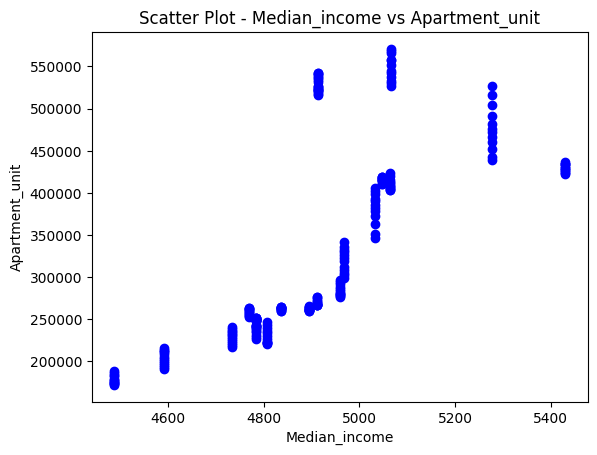

In [97]:
# Median Income vs Apartment Price Scatter Plot
plt.scatter(merged_df['Median income'], merged_df['Apartment_unit'], color='blue')
plt.title('Scatter Plot - Median_income vs Apartment_unit')
plt.xlabel('Median_income')
plt.ylabel('Apartment_unit')
plt.show()

## The Spearman coefficient statistical test is chosen

In [98]:
import scipy.stats as stats
from scipy.stats import spearmanr
#Calculate Spearman coefficient and p_value

spearman_corr, p_value = spearmanr(merged_df['Apartment_unit'], merged_df['Median income'])
print(f"Coeficiente de Spearman: {spearman_corr}")
print(f"Valor p_value: {p_value}")

Coeficiente de Spearman: 0.8849313165641091
Valor p_value: 2.7785147729821314e-79


## Summary
- Spearman coefficient 0.8849: Indicates that, in general, as median income increases, apartment unit prices (Apartment_unit) also tend to increase.
- p_value: 2.7785e-79: This value is much lower than the common significance level of α=0.05. This means that there is sufficient evidence to reject the null hypothesis and conclude that there is a significant correlation.
- **Conclusion:**
    - The null hypothesis is rejected: There is a significant correlation between apartment prices and median income.
    - The correlation is strong, suggesting that as median income increases, apartment unit prices also tend to increase.